In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [5]:
start = datetime.datetime(1982,12, 31)
end = datetime.datetime(2023, 12, 31)

In [6]:
SP500 = yf.download('^GSPC', start, end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
SP500.to_csv('SP500.csv')

In [8]:
#SP500 = pd.read_csv('SP500.csv')

In [9]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000


In [10]:
SP500['Adj Close'].head()

Date
1982-12-31    140.639999
1983-01-03    138.339996
1983-01-04    141.360001
1983-01-05    141.960007
1983-01-06    145.270004
Name: Adj Close, dtype: float64

In [11]:
SP500['Adj Close'].tail()

Date
2023-12-22    4754.629883
2023-12-26    4774.750000
2023-12-27    4781.580078
2023-12-28    4783.350098
2023-12-29    4769.830078
Name: Adj Close, dtype: float64

Calcoliamo i rendimenti semplici lordi e netti e logaritmici.<br> 
Ciò che fa è prendere il prezzo di chiusura aggiustato e dividerlo per il prezzo di chiusura shiftato di uno (in questo modo è come se prendesse il prezzo di chisura aggiustato del giorno x / il prezzo di chiusura aggiustato del giorno x - 1). <br>
L'idea è quella che abbiamo anche visto a lezione: ho una serie di prezzi e divido il prezzo al tempo t con il prezzo al tempo t - 1 per calcolare il ritorno.

In [75]:
SP500['RS_Lordo'] = SP500['Adj Close']/SP500['Adj Close'].shift(1) # ritorno lordo

In [13]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo
Date,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000,0.983646
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000,1.021830
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000,1.004245
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000,1.023316


Il ritorno netto è dato da ritorno lordo - 1. <br>
Il metodo pct_change() viene utilizzato per calcolare la percentuale di cambiamento tra i valori consecutivi in una Serie o in un DataFrame lungo un determinato asse: nel nostro caso, quindi, corrisponde al ritorno netto.

In [14]:
SP500['RS_Netto'] = SP500['Adj Close'].pct_change(1)

In [15]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto
Date,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000,0.983646,-0.016354
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000,1.021830,0.021830
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000,1.004245,0.004245
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000,1.023316,0.023316


Come abbiamo detto a lezione, a volte lavorare con il ritorno lordo logaritmico è più comodo. Ricordiamo infatti che il ritorno lordo su un periodo (t - 1, t), formato da n sottoperiodi, è dato dalla produttoria del ritorno lordo di ciascun sottoperiodo. La produttoria è difficilmente manipolabile, per cui spesso viene utilizzato il ritorno lordo logaritmico per fare delle oeprazioni. Il ritorno lordo logaritmico su un periodo (t - 1, t), fomrato da n sottoperiodi è infatti dato dalla somma del ritorno lordo logaritmici di ciascun sottoperiodo.

In [16]:
SP500['RL'] = np.log(SP500['Adj Close']/SP500['Adj Close'].shift(1))

In [17]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL
Date,,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN,NaN
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000,0.983646,-0.016354,-0.016489
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000,1.021830,0.021830,0.021595
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000,1.004245,0.004245,0.004236
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000,1.023316,0.023316,0.023049


Qual é il collegamento fra rendimenti semplici e logaritmici.
Aumentando la frequenza di capitalizzazione il rendimento composto semplice si avvicina a quello logaritmico.


In [18]:
f = [1, 2, 4, 12, 52, 365, 730, 1460]
r = 0.10
tassi = []

for i in f:
    tasso = (1+r/i)**i - 1
    tassi.append(tasso)

for i in tassi:
    print(round(i, 7))

print(round(np.exp(r)-1, 7))

0.1
0.1025
0.1038129
0.1047131
0.1050648
0.1051558
0.1051633
0.1051671
0.1051709


Differenze fra rendimenti semplici e logaritmici

o	Rendimenti semplici non si sommano nel tempo, logaritmici sì

o	Rendimenti semplici si sommano nel portafoglio, logaritmici no

o	Rendimenti semplici sono sensibili alla frequenza di calcolo, logaritmici no


Il prodotto dei rendimenti lordi è il valore capitalizzato dell'investimento di un'unità al rendimento della serie. Sta frase serve a dire che se prendiamo i rendimenti lordi semplici e li moltiplichiamo tra loro otteniamo il rendimento lordo su tutto il periodo. Questo lavoro viene fatto su ciascun elemento della serie tramite la funzione cumprod(). Lui vuole fare questo lavoro per ciacuna cella.

In [19]:
SP500['Cum'] = np.cumprod(SP500['RS_Lordo'])

In [20]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL,Cum
Date,,,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN,NaN,NaN
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000,0.983646,-0.016354,-0.016489,0.983646
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000,1.021830,0.021830,0.021595,1.005119
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000,1.004245,0.004245,0.004236,1.009386
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000,1.023316,0.023316,0.023049,1.032921


In [21]:
SP500.tail()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL,Cum
Date,,,,,,,,,,
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000,1.001660,0.001660,0.001659,33.807095
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000,1.004232,0.004232,0.004223,33.950157
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000,1.001430,0.001430,0.001429,33.998721
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,4783.350098,2698860000,1.000370,0.000370,0.000370,34.011306
2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,4769.830078,3126060000,0.997174,-0.002826,-0.002830,33.915174


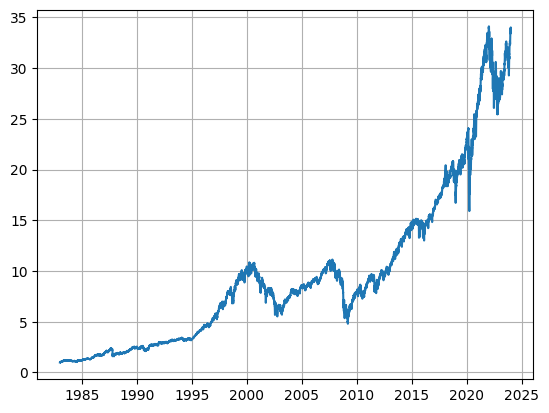

In [22]:
plt.plot(SP500['Cum'])
plt.grid()

In [76]:
SP500['Adj Close'].iloc[-1]

4769.830078125

In [77]:
SP500['Adj Close'].iloc[0]

140.63999938964844

In [78]:
SP500['Adj Close'].iloc[0] * SP500['Cum'].iloc[-1]

4769.83007812502

In [79]:
SP500['Adj Close'].iloc[-1] / SP500['Adj Close'].iloc[0]

33.915174195287115

In [80]:
SP500['Cum'].iloc[-1]

33.91517419528726

Calcoliamo il rendimento composto annuo dell'investimento sul periodo considerato

In [28]:
from datetime import timedelta

In [29]:
delta = end - start
delta.days

14975

In [30]:
t = delta/datetime.timedelta(days=1)

In [31]:
t

14975.0

In [32]:
type(t)

float

Giorni esatti

In [33]:
t/365

41.02739726027397

In [82]:
SP500_cagr = (SP500['Adj Close'].iloc[-1]/SP500['Adj Close'].iloc[0])**(365/t) -1
SP500_cagr

45179.24430107542

Approssimazione 41 anni

In [83]:
SP500['Cum'].iloc[-1]**(1/41) - 1

0.08974951447728596

Per avere una serie più maneggevole passiamo da una frequenza giornaliera a una frequenza mensile.
Utilizzamo il metodo "groupby" e la frequenza mensile ('ME'). Poichè vogliamo il valore di fine mese specifichiamo ".last()".
Attenzione: nelle analisi di serie storiche utilizzare sempre valori osservati (giorni, fine settimana, fine mese eccetera) mai medie (".mean()") perché creiamo valori che non corrispondono a veri investimenti e riduciamo artificiosamente la volatilità

In [84]:
SP500_m = SP500.groupby(pd.Grouper(freq='ME')).last() #aggregazione mensile
SP500_m.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL,Cum
Date,,,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN,NaN,NaN
1983-01-31,144.509995,145.300003,143.929993,145.300003,145.300003,67140000,1.005467,0.005467,0.005452,1.033134
1983-02-28,149.740005,149.740005,147.809998,148.059998,148.059998,83750000,0.988781,-0.011219,-0.011283,1.052759
1983-03-31,153.410004,155.020004,152.860001,152.960007,152.960007,100570000,0.997197,-0.002803,-0.002807,1.087600
1983-04-30,162.970001,164.429993,162.720001,164.429993,164.429993,105750000,1.009083,0.009083,0.009042,1.169155


In [37]:
SP500_m['RS_Lordo']=SP500_m['Adj Close']/SP500_m['Adj Close'].shift(1)

In [38]:
SP500_m['RS_Netto'] = SP500_m['Adj Close'].pct_change(1)

In [39]:
SP500_m['RL']= np.log(SP500_m['Adj Close']/SP500_m['Adj Close'].shift(1))

In [40]:
SP500_m.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL,Cum
Date,,,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN,NaN,NaN
1983-01-31,144.509995,145.300003,143.929993,145.300003,145.300003,67140000,1.033134,0.033134,0.032597,1.033134
1983-02-28,149.740005,149.740005,147.809998,148.059998,148.059998,83750000,1.018995,0.018995,0.018817,1.052759
1983-03-31,153.410004,155.020004,152.860001,152.960007,152.960007,100570000,1.033095,0.033095,0.032559,1.087600
1983-04-30,162.970001,164.429993,162.720001,164.429993,164.429993,105750000,1.074987,0.074987,0.072308,1.169155


In [85]:
SP500_m['Adj Close'].iloc[-1]/SP500_m['Adj Close'].iloc[0]

33.915174195287115

Prima differenza: Rendimenti semplici non si sommano nel tempo, logaritmici sì
Se prendiamo il rendimento semplice medio e lo capitalizziamo per il numero di periodi (41 anni per 12 mesi = 492) otteniamo un valore finale miolto più elevato di quello corretto.
Se facciamo la stessa cosa con il rendimento logaritmico medio otteniamo il valore corretto.

In [42]:
RS_Netto_m = np.mean(SP500_m['RS_Netto'])
RS_Netto_m

0.008156658344535056

In [43]:
RL_m = np.mean(SP500_m['RL'])
RL_m

0.0071623222166996535

In [44]:
(1+RS_Netto_m)**(41*12)

54.423591010684014

In [45]:
np.exp(RL_m*41*12)

33.91517419528715

Possiamo passare da rendimenti semplici a rendimenti logaritmici grazie a un risultato ricavato dal cosiddetto Lemma di Ito per il quale RL = RS - 0.5*Var(RS)

In [46]:
RS_Netto_var = np.var(SP500_m['RS_Netto'])

In [47]:
RS_Netto_m - 0.5*RS_Netto_var

0.0072030306685217935

Rendimenti e portafogli

La media ponderata dei rendimenti semplici delle componenti di un portafoglio è uguale al rendimento del portafoglio

In [48]:
weights = np.array([0.2,0.5,0.3])

In [49]:
inizio = np.array([100, 100, 100])

In [50]:
port_inizio = np.sum(weights*inizio)
port_inizio

100.0

In [51]:
fine = np.array([102,105,115])

In [52]:
ret_s = fine/inizio -1

In [53]:
ret_s

array([0.02, 0.05, 0.15])

In [54]:
port_fine_s = np.sum(weights*fine)
port_fine_s

107.4

In [55]:
ret_port = np.sum(weights*ret_s)
ret_port

0.074

In [56]:
port_fine_s_check = port_inizio * (1+ret_port)
port_fine_s_check

107.4

In [57]:
port_fine_s == port_fine_s_check

True

La media ponderata dei rendimenti logaritmici delle componenti di un portafoglio è diversa dal rendimento logaritmico del portafoglio

In [58]:
ret_l = np.log(fine/inizio)
ret_l

array([0.01980263, 0.04879016, 0.13976194])

In [59]:
ret_pond_log = np.sum(ret_l*weights)
ret_pond_log

0.07028419025649957

In [60]:
ret_port_log = np.log(107.4/100)
ret_port_log

0.071389996086673

In [61]:
ret_port_log == ret_pond_log

False

#### Valori finali di un percorso di accumulazione e distribuzione log normale


In [62]:
ret = RS_Netto_m
ret

0.008156658344535056

In [63]:
std = np.sqrt(RS_Netto_var)
std

0.04367213473173167

Creaimo 10000 percorsi di investimento mensili per 10 anni utilizzando media e deviazione standard storiche del S&P500 con un metodo chiamato simulazione MonteCarlo

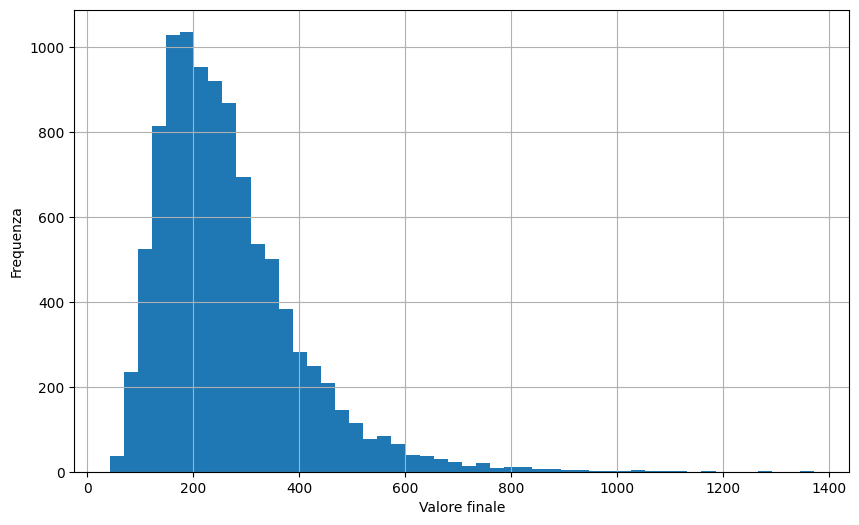

In [64]:
n = 10000
T = 120
Port = np.zeros((T+1, n))
Port[0] = 100
for t in range(1, T+1):
    Port[t] = Port[t-1]*(1+ (ret + std*np.random.randn(n)))

plt.figure(figsize = (10,6))
plt.hist(Port[-1], bins = 50)
plt.xlabel('Valore finale')
plt.ylabel('Frequenza')
plt.grid()


In [65]:
port_log = np.log(Port[-1])

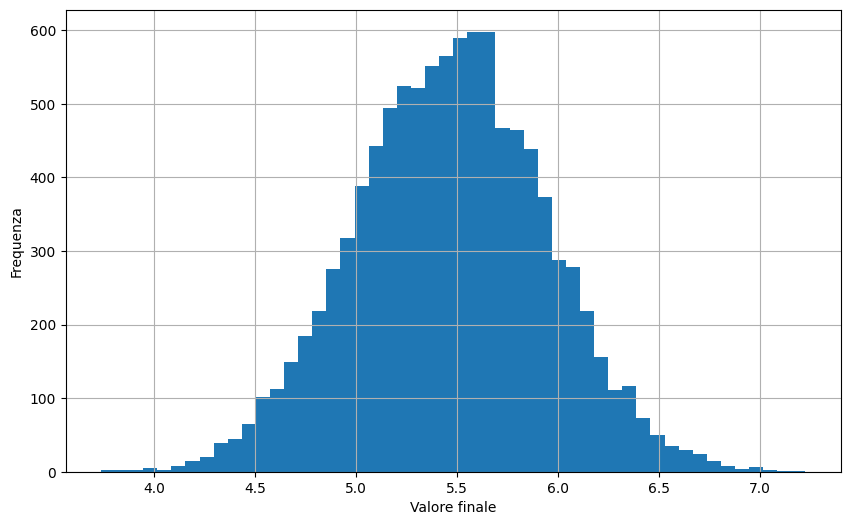

In [66]:
plt.figure(figsize = (10,6))
plt.hist(port_log, bins = 50)
plt.xlabel('Valore finale')
plt.ylabel('Frequenza')
plt.grid()
